## CSE-221710315024-LIKHITA YANAMADDI

# DATASET DRIVE LINK:
## https://drive.google.com/drive/folders/1lYK2CvHI9cQcc2SIT9CEyFceYDqRASui?usp=sharing

In [2]:
!pip install soundfile


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [5]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [6]:
def load_data(test_size=0.2):
    X, y = [], []
    try :
      for file in glob.glob("/content/drive/My Drive/Colab Notebooks/data_set/Speech Emotion Recognition-Project Data//Actor_*/*.wav"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
              continue
          # extract speech features
          features = extract_feature(file, mfcc=True, chroma=True, mel=True)
          # add to data
          X.append(features)
          l={'happy':0.0,'sad':1.0,'neutral':3.0,'angry':4.0}
          y.append(l[emotion])
    except :
         pass
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)


In [7]:
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

03-01-05-02-01-01-19.wav
03-01-04-01-01-01-19.wav
03-01-05-01-01-01-19.wav
03-01-03-02-01-01-19.wav
03-01-02-01-01-01-19.wav
03-01-05-01-01-02-19.wav
03-01-04-02-01-02-19.wav
03-01-04-02-02-01-19.wav
03-01-06-02-01-02-19.wav
03-01-06-01-01-02-19.wav
03-01-06-02-02-01-19.wav
03-01-03-01-02-02-19.wav
03-01-04-02-02-02-19.wav
03-01-07-01-02-01-19.wav
03-01-08-01-01-02-19.wav
03-01-03-01-02-01-19.wav
03-01-01-01-01-01-19.wav
03-01-02-02-02-01-19.wav
03-01-07-02-02-01-19.wav
03-01-01-01-02-02-19.wav
03-01-02-01-01-02-19.wav
03-01-02-02-02-02-19.wav
03-01-03-01-01-01-19.wav
03-01-05-01-02-02-19.wav
03-01-02-02-01-02-19.wav
03-01-01-01-02-01-19.wav
03-01-03-02-02-02-19.wav
03-01-06-02-01-01-19.wav
03-01-08-02-01-01-19.wav
03-01-04-01-02-02-19.wav
03-01-06-01-01-01-19.wav
03-01-03-01-01-02-19.wav
03-01-01-01-01-02-19.wav
03-01-07-02-01-01-19.wav
03-01-02-01-02-01-19.wav
03-01-04-02-01-01-19.wav
03-01-03-02-01-02-19.wav
03-01-08-01-01-01-19.wav
03-01-08-01-02-02-19.wav
03-01-05-02-01-02-19.wav


In [8]:
import numpy as np
X_train = np.asarray(X_train)
y_train= np.asarray(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((504, 180), (504,), (168, 180), (168,))

In [10]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [11]:
x_traincnn.shape,x_testcnn.shape

((504, 180, 1), (168, 180, 1))

In [12]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LeakyReLU
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=(8)))



model.add(Conv1D(128, 5,padding='same',))                           #2
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))



model.add(Flatten())
#model.add(Dense(16))
#model.add(Activation('relu'))
model.add(Dense(8))     
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(
    learning_rate=0.0005, momentum=0.7, nesterov=False, 
)

Using TensorFlow backend.


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 180, 128)          768       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 180, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 180, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 22, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 128)           82048     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 22, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 128)          

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [15]:

cnnhistory=model.fit(x_traincnn, y_train, batch_size=30, epochs=500)

Epoch 1/500
504/504 [==============================] - 1s 2ms/step - loss: 7.2658 - accuracy: 0.2599
Epoch 2/500
504/504 [==============================] - 0s 945us/step - loss: 2.2124 - accuracy: 0.3452
Epoch 3/500
504/504 [==============================] - 0s 958us/step - loss: 1.6028 - accuracy: 0.3690
Epoch 4/500
504/504 [==============================] - 0s 921us/step - loss: 1.4552 - accuracy: 0.3710
Epoch 5/500
504/504 [==============================] - 1s 993us/step - loss: 1.3720 - accuracy: 0.3750
Epoch 6/500
504/504 [==============================] - 0s 935us/step - loss: 1.3589 - accuracy: 0.3690
Epoch 7/500
504/504 [==============================] - 0s 943us/step - loss: 1.2831 - accuracy: 0.4127
Epoch 8/500
504/504 [==============================] - 0s 933us/step - loss: 1.2971 - accuracy: 0.4028
Epoch 9/500
504/504 [==============================] - 0s 945us/step - loss: 1.2263 - accuracy: 0.4127
Epoch 10/500
504/504 [==============================] - 0s 928us/step - los

In [16]:
print(cnnhistory.history['accuracy'][-1])


0.6964286


In [17]:
score, acc = model.evaluate(x_traincnn, y_train)
score, acc = model.evaluate(x_testcnn, y_test)
print('Train score:', score)
print('Train accuracy:', acc)
print('Test score:', score)
print('Test accuracy:', acc)

168/168 [==============================] - 0s 244us/step
Train score: 0.8323247290792919
Train accuracy: 0.625
Test score: 0.8323247290792919
Test accuracy: 0.625


In [18]:
cnn_accuracy=0.765


machine learning algorithms

In [19]:
#ml algorithms
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [20]:
"""DECISION TREE """

dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
dtAccuracy=accuracy_score(y_true=y_test,y_pred=dtree_predictions)


print(classification_report(y_test,dtree_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, dtree_predictions) )

0.5595238095238095
              precision    recall  f1-score   support

         0.0       0.45      0.36      0.40        39
         1.0       0.61      0.56      0.58        54
         3.0       0.43      0.59      0.50        27
         4.0       0.67      0.71      0.69        48

    accuracy                           0.56       168
   macro avg       0.54      0.55      0.54       168
weighted avg       0.56      0.56      0.56       168

[[14  8  5 12]
 [ 4 30 15  5]
 [ 3  8 16  0]
 [10  3  1 34]]


In [21]:
"""SUPPORT VECTOR MACHINE"""
"""train accuracy"""

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_train) 


print(accuracy_score(y_true=y_train,y_pred=svm_predictions))
svmAccuracy=accuracy_score(y_true=y_train,y_pred=svm_predictions)
print(classification_report(y_train,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_train, svm_predictions) )

0.878968253968254
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       153
         1.0       0.84      0.84      0.84       138
         3.0       0.83      0.77      0.80        69
         4.0       0.95      0.96      0.95       144

    accuracy                           0.88       504
   macro avg       0.87      0.86      0.87       504
weighted avg       0.88      0.88      0.88       504

[[136   9   1   7]
 [ 11 116  10   1]
 [  3  13  53   0]
 [  6   0   0 138]]


In [22]:
"""SUPPORT VECTOR MACHINE"""
"""test accuracy"""

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
svmAccuracy=accuracy_score(y_true=y_test,y_pred=svm_predictions)
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.6309523809523809
              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        39
         1.0       0.62      0.56      0.59        54
         3.0       0.40      0.30      0.34        27
         4.0       0.82      0.88      0.85        48

    accuracy                           0.63       168
   macro avg       0.59      0.60      0.59       168
weighted avg       0.62      0.63      0.62       168

[[26  4  2  7]
 [14 30  9  1]
 [ 6 12  8  1]
 [ 3  2  1 42]]


In [23]:
"""Random Forest"""
 
 
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0) 
  
# fit the regressor with x and y data 
classifier.fit(X_train, y_train)   

c_p = classifier.predict(X_train) 


print(accuracy_score(y_true=y_train,y_pred=c_p))
rfAccuracy=accuracy_score(y_true=y_train,y_pred=c_p)
print(classification_report(y_train,c_p)) 
# creating a confusion matrix 
print(confusion_matrix(y_train,c_p) )

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00       138
         3.0       1.00      1.00      1.00        69
         4.0       1.00      1.00      1.00       144

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504

[[153   0   0   0]
 [  0 138   0   0]
 [  0   0  69   0]
 [  0   0   0 144]]


In [24]:
"""Random Forest"""
 
 
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0) 
  
# fit the regressor with x and y data 
classifier.fit(X_train, y_train)   

c_p = classifier.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=c_p))
rfAccuracy=accuracy_score(y_true=y_test,y_pred=c_p)
print(classification_report(y_test,c_p)) 
# creating a confusion matrix 
print(confusion_matrix(y_test,c_p) )


0.7202380952380952
              precision    recall  f1-score   support

         0.0       0.58      0.79      0.67        39
         1.0       0.74      0.74      0.74        54
         3.0       0.68      0.56      0.61        27
         4.0       0.90      0.73      0.80        48

    accuracy                           0.72       168
   macro avg       0.73      0.71      0.71       168
weighted avg       0.74      0.72      0.72       168

[[31  4  1  3]
 [ 7 40  6  1]
 [ 3  9 15  0]
 [12  1  0 35]]


MLP Classifier

In [25]:
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

In [26]:
# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
from sklearn.neural_network import MLPClassifier
modelmlp = MLPClassifier(**model_params)

In [27]:
# train the model
print("[*] Training the model...")
modelmlp.fit(X_train, y_train)

# predict 75% of data to measure how good we are
y_pred = modelmlp.predict(X_train)

# calculate the accuracy
mlpAccuracy = accuracy_score(y_true=y_train, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(mlpAccuracy*100))

[*] Training the model...
Accuracy: 98.81%


In [28]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       153
         1.0       0.96      0.99      0.98       138
         3.0       0.98      0.94      0.96        69
         4.0       1.00      1.00      1.00       144

    accuracy                           0.99       504
   macro avg       0.99      0.98      0.98       504
weighted avg       0.99      0.99      0.99       504

[[152   1   0   0]
 [  0 137   1   0]
 [  0   4  65   0]
 [  0   0   0 144]]


In [29]:
# train the model
print("[*] Training the model...")
modelmlp.fit(X_train, y_train)

# predict 25% of data to measure how good we are
y_pred = modelmlp.predict(X_test)

# calculate the accuracy
mlpAccuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(mlpAccuracy*100))

[*] Training the model...
Accuracy: 67.86%


In [30]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.59      0.67        39
         1.0       0.69      0.67      0.68        54
         3.0       0.46      0.44      0.45        27
         4.0       0.72      0.90      0.80        48

    accuracy                           0.68       168
   macro avg       0.66      0.65      0.65       168
weighted avg       0.68      0.68      0.67       168

[[23  3  4  9]
 [ 3 36  8  7]
 [ 2 12 12  1]
 [ 2  1  2 43]]


In [31]:
accuracy=[dtAccuracy*100,cnn_accuracy*100,mlpAccuracy*100,rfAccuracy*100,svmAccuracy*100]
algos=["DecisionTree","CNN","MLP","RandomForest","SVM"]

In [32]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

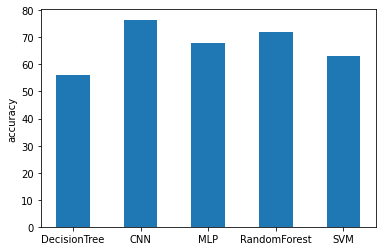

In [33]:
plt.ylabel("accuracy")
plt.bar(algos,accuracy,0.5)